In [1]:
""" Convolution function: It accepts as input an image, a filter kernel, stride, padding and the non-linear
function. The function must correlate (convolve) the input image (after padding if specified) with
the kernel (at the specified stride size) and generate an output activation after applying the specified
non-linearity. Verify with the standard options for the non-linear activation functions - sigmoid,
tanh, ReLU, Parametric ReLU (PReLU). Display the input image, the filter kernel and the output
activation map. Ensure that your function can accept multi-channel input and a corresponding kernel
volume. (3) """
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Define an example 3D input image (3x4x4)
input_image = cv2.imread('left.png')

# Define a 3x3x3 kernel
kernel = np.random.rand(3, 3, 3)

# Define stride, padding, and activation function
stride = 1
padding = 1 # 'same' padding, so that the output has the same spatial dimensions as the input


def relu(x):
    return max(0, x)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def prelu(x, alpha):
    return np.maximum(0, x) + alpha * np.minimum(0, x)
    

def convolution(input_image, kernel, stride, padding, activation_fn):

    # Calculate the dimensions of the output feature map
    input_row, input_col, input_ch = input_image.shape
    kernel_row, kernel_col, kernel_ch = kernel.shape
    output_row = (input_row - kernel_row + 2 * padding) // stride + 1
    output_col = (input_col - kernel_col + 2 * padding) // stride + 1
    
    input_image = np.pad(input_image, ((padding,padding),(padding,padding+1),(0,0)), mode='constant', constant_values=0)
    
    # Initialize the output feature map
    output = np.zeros((output_row, output_col), dtype=float)
    j=0
    i=0
    # Perform the convolution operation for multichannel input and kernel
    for i in range(output_row):
        for j in range(output_col):
            input_slice = input_image[i*stride:i*stride+kernel_col, j*stride:j*stride+kernel_row, :]
            if(activation_fn == 'relu'):
                output[i, j] = relu(np.sum(input_slice * kernel))
            elif(activation_fn == 'tanh'):
                output[i, j] = tanh(np.sum(input_slice * kernel))
            elif(activation_fn == 'sigmoid'):
                output[i, j] = sigmoid(np.sum(input_slice * kernel))
            elif(activation_fn == 'prelu'):
                output[i, j] = prelu(np.sum(input_slice * kernel),0.125)
            else:
                output[i, j] = np.sum(input_slice * kernel)
    
    # Print the result
    return output

output1 = convolution(input_image, kernel, stride, padding, 'relu')
output2 = convolution(input_image, kernel, stride, padding, 'tanh')
output3 = convolution(input_image, kernel, stride, padding, 'sigmoid')
output4 = convolution(input_image, kernel, stride, padding, 'prelu')

/tmp/ipykernel_4307/230232508.py:29: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
/tmp/ipykernel_4307/230232508.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


AttributeError: 'numpy.ndarray' object has no attribute 'axis'

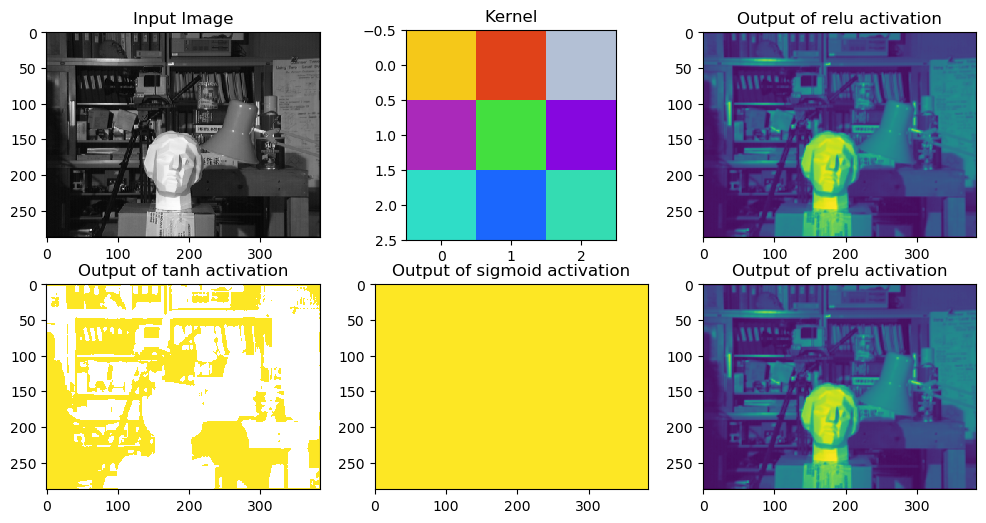

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Create a figure with three subplots in a row
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Display the input image on the first subplot
axes[0,0].imshow(input_image)
axes[0,0].set_title('Input Image')

# Display the kernel image on the second subplot
axes[0,1].imshow(kernel)
axes[0,1].set_title('Kernel')

# Display the relu activation image on the third subplot
axes[0,2].imshow(output1)
axes[0,2].set_title('Output of relu activation')

# Display the tanh activation image on the third subplot
axes[1,0].imshow(output2)
axes[1,0].set_title('Output of tanh activation')

# Display the sigmoid activation image on the third subplot
axes[1,1].imshow(output3)
axes[1,1].set_title('Output of sigmoid activation')

# Display the prelu activation image on the third subplot
axes[1,2].imshow(output4)
axes[1,2].set_title('Output of prelu activation')

# Hide axis labels and ticks for a cleaner look
for ax in axes:
    ax.axis('off')

# Show the plot
plt.show()


In [38]:
"""Pooling function: It accepts as input the activation map output from the convolution function, a
pooling function, and stride. The function must output the appropriately pooled activation map.
Display the input activation map and the pooled output. (2)"""

def custom_pooling(input_data, pool_size, stride, pool_type):
    # Determine the size of the output feature map
    output_height = (input_data.shape[0] - pool_size[0]) // stride[0] + 1
    output_width = (input_data.shape[1] - pool_size[1]) // stride[1] + 1
    output_ch = pool_size[2]

    # Initialize the output feature map
    output_data = np.zeros((output_height, output_width, output_ch))
    for k in range(output_ch):
        for i in range(output_height):
            for j in range(output_width):
                # Calculate the pooling window
                pool_window = input_data[i*stride[0]:i*stride[0]+pool_size[0], j*stride[1]:j*stride[1]+pool_size[1],:]
    
                # Apply the specified pooling type
                if pool_type == 'max':
                    output_data[i, j, k] = np.max(pool_window)
                elif pool_type == 'average':
                    output_data[i, j, k] = np.mean(pool_window)

    return output_data

pool_size = (3, 3, 3)
stride = (1, 1)
pooled_data_relu = custom_pooling(output1, pool_size, stride, pool_type='max')
pooled_data_tanh = custom_pooling(output2, pool_size, stride, pool_type='max')
pooled_data_sigmoid = custom_pooling(output3, pool_size, stride, pool_type='max')
pooled_data_prelu = custom_pooling(output4, pool_size, stride, pool_type='max')

IndexError: too many indices for array

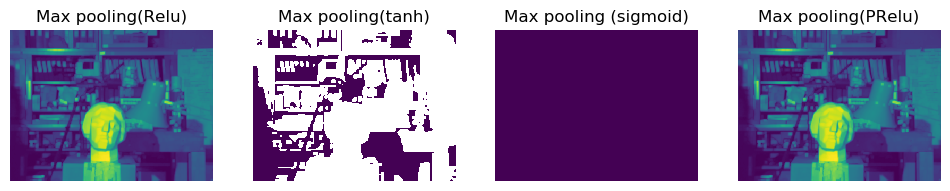

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Create a figure with 1x4 subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(12, 10))

# Display the first image on the first subplot
axes[0].imshow(pooled_data_relu)
axes[0].set_title('Max pooling(Relu)')

# Display the second image on the second subplot
axes[1].imshow(pooled_data_tanh)
axes[1].set_title('Max pooling(tanh)')

# Display the third image on the third subplot
axes[2].imshow(pooled_data_sigmoid)
axes[2].set_title('Max pooling (sigmoid)')

# Display the fourth image on the fourth subplot
axes[3].imshow(pooled_data_prelu)
axes[3].set_title('Max pooling(PRelu)')

# Hide axis labels and ticks for a cleaner look
for ax in axes:
    ax.axis('off')

# Show the plot
plt.show()


In [41]:
""" Convolution layer function: It accepts as input a volume (image or activation maps), filter kernels,
stride, padding and the non-linear function. The function must convolve the input volume (after
padding if specified) with each of the kernels (at the specified stride size) and generates an output
activation volume after applying the specified non-linearity. Display the input image or activation
maps, the filter kernels and the output activation maps. Verify that the output of this function does
indeed have the expected size (W × H × C) as discussed in class. (1)"""

def convolution_layer(input_image, filter_kernels, stride, padding, activation_fn):
    
    stride_h, stride_w = stride

    # Calculate the dimensions of the output feature map
    input_row, input_col, input_ch = input_image.shape
    kernel_row, kernel_col, kernel_ch, num_kernels = filter_kernels.shape
    output_row = (input_row - kernel_row + 2 * padding) // stride_h + 1
    output_col = (input_col - kernel_col + 2 * padding) // stride_w + 1
    output_ch = num_kernels
    
    input_image = np.pad(input_image, ((padding,padding),(padding,padding+1),(0,0)), mode='constant', constant_values=0)
    
    # Initialize the output feature map
    output = np.zeros((output_row, output_col, output_ch), dtype=float)
    j=0
    i=0
    # Perform the convolution operation for multichannel input and kernel
    for k in range(output_ch):
        kernel = filter_kernels[:,:,:,k]
        for i in range(output_row):
            for j in range(output_col):
                input_slice = input_image[i*stride_h:i*stride_h+kernel_row, j*stride_w:j*stride_w+kernel_col, :]
                if(activation_fn == 'relu'):
                    output[i, j, k] = relu(np.sum(input_slice * kernel))
                elif(activation_fn == 'tanh'):
                    output[i, j, k] = tanh(np.sum(input_slice * kernel))
                elif(activation_fn == 'sigmoid'):
                    output[i, j, k] = sigmoid(np.sum(input_slice * kernel))
                elif(activation_fn == 'prelu'):
                    output[i, j, k] = prelu(np.sum(input_slice * kernel),0.125)
                else:
                    output[i, j, k] = np.sum(input_slice * kernel)
        
    # Print the result
    return output

# Example usage:
input_volume = input_image  # Replace with your input data
filter_kernels = np.random.rand(3, 3, 3, 4)  # Replace with your filter kernels
stride = (1, 1)
padding = 1

output_activation_volume = convolution_layer(input_volume, filter_kernels, stride, padding, 'relu')


In [42]:
output_activation_volume.shape

(288, 384, 4)

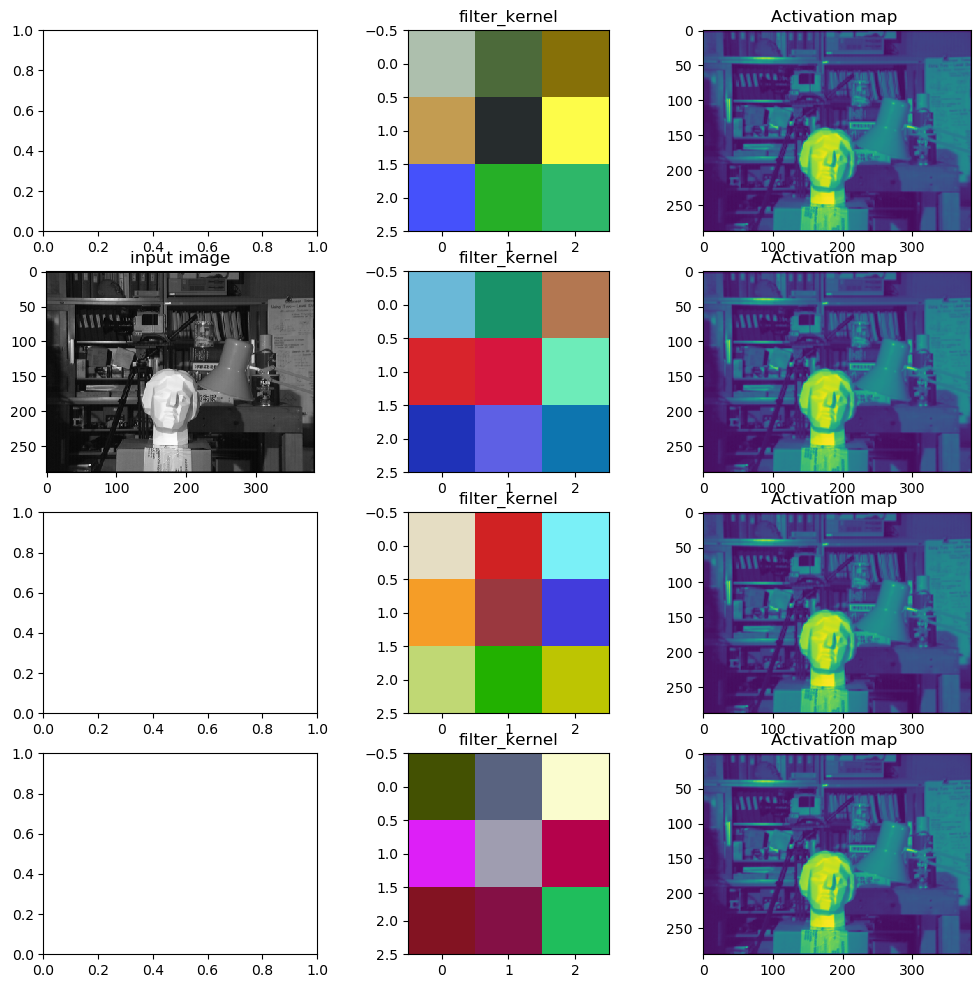

In [43]:
import numpy as np
import matplotlib.pyplot as plt

x,y,z,num_kernels = filter_kernels.shape
fig, axes = plt.subplots(num_kernels, 3, figsize=(12, 12))

axes[1,0].imshow(input_image)
axes[1,0].set_title('input image')


for i in range(num_kernels):
    axes[i,1].imshow(filter_kernels[:,:,:,i])
    axes[i,1].set_title('filter_kernel')
    axes[i,2].imshow(output_activation_volume[:,:,i])
    axes[i,2].set_title('Activation map ')

In [53]:
"""4.Pooling layer function: It accepts as input the activation map volume, the pooling function, stride,
and generates a pooled output volume. Display the input and output volumes. (1)

5. Flattening (unraveling) function: It accepts as input the activation map volume output by the pool-
ing layer and generates a vector of a specified size. It is important to note that this function has a
weight matrix associated with it whose size is chosen such that the input and desired output sizes are
matched. (1)
6. Multilayer Perceptron (MLP) function (Fully Connected): It accepts as input a vector, the number of
hidden layers, the size of each hidden layer, the non-linear function, and the size of the output layer.
This function should generate an output vector of the specified size. Generate the output with and
without the softmax function applied to the output layer. (2)"""


def pooling_layer(input_volume, pool_size, stride, pooling_function):
    # Get the dimensions of the input volume
    input_height, input_width, input_channels = input_volume.shape

    # Calculate the dimensions of the output volume
    output_height = (input_height - pool_size) // stride + 1
    output_width = (input_width - pool_size) // stride + 1
    output_channels = input_channels

    # Create an empty output volume
    output_volume = np.zeros((output_height, output_width, output_channels))

    # Apply pooling to generate the output volume
    for i in range(output_height):
        for j in range(output_width):
            for k in range(output_channels):
                # Extract the corresponding input region
                start_height = i * stride
                start_width = j * stride
                end_height = start_height + pool_size
                end_width = start_width + pool_size

                input_region = input_volume[start_height:end_height, start_width:end_width, k]

                # Apply the specified pooling function
                output_volume[i, j, k] = pooling_function(input_region)

    return output_volume

pool_size = 2
stride = 2
pooling_function = np.max  # Max Pooling

pooling_activation_volume = pooling_layer(output_activation_volume, pool_size, stride, pooling_function)
pooling_activation_volume.shape

(144, 192, 4)

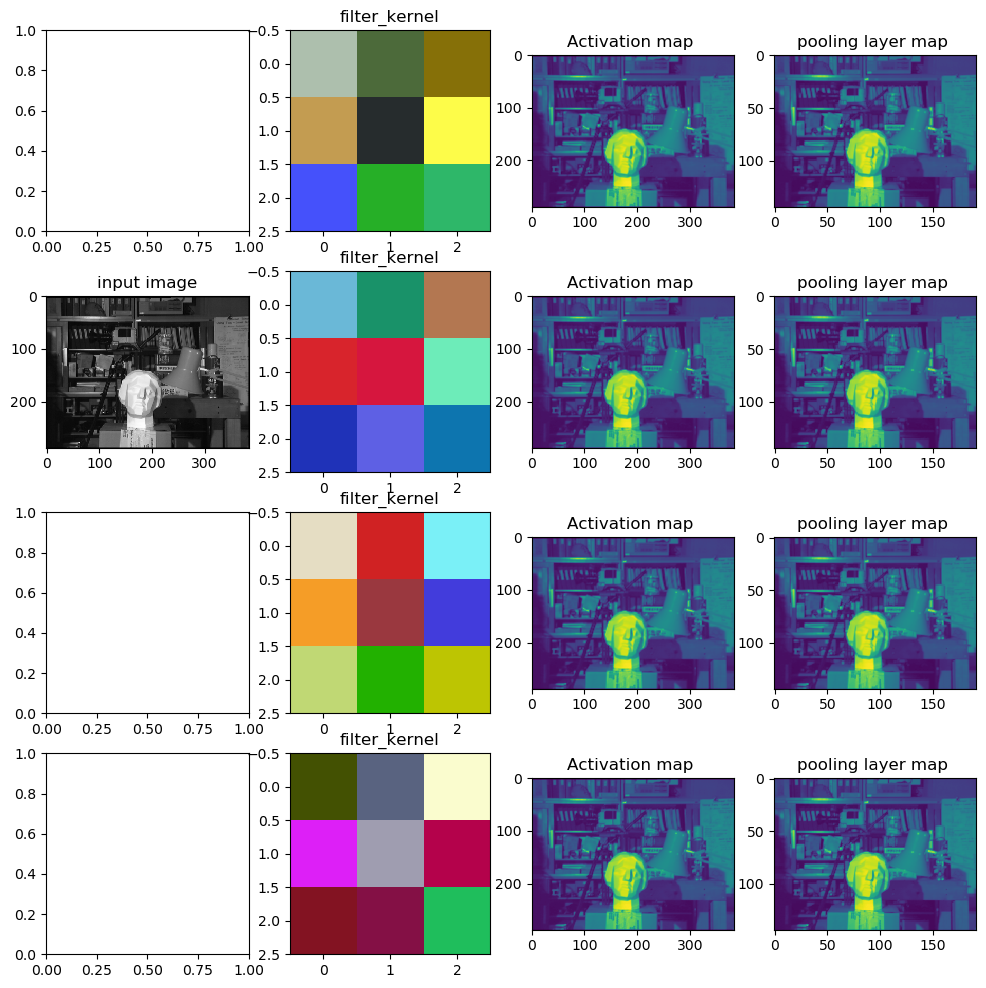

In [54]:
x,y,z,num_kernels = filter_kernels.shape
fig, axes = plt.subplots(num_kernels, 4, figsize=(12, 12))

axes[1,0].imshow(input_image)
axes[1,0].set_title('input image')


for i in range(num_kernels):
    axes[i,1].imshow(filter_kernels[:,:,:,i])
    axes[i,1].set_title('filter_kernel')
    axes[i,2].imshow(output_activation_volume[:,:,i])
    axes[i,2].set_title('Activation map ')
    axes[i,3].imshow(pooling_activation_volume[:,:,i])
    axes[i,3].set_title('pooling layer map ')

In [55]:
def flatten_layer(input_volume):
    # Calculate the size of the flattened vector
    flattened_size = np.prod(input_volume.shape)

    # Reshape the input volume to a 1D vector
    flattened_vector = input_volume.reshape(flattened_size)

    return flattened_vector

# Example usage:
input_activation_volume = pooling_activation_volume
flattened_vector = flatten_layer(input_activation_volume)


In [56]:
flattened_vector.shape

(110592,)

In [58]:
def mlp_layer(input_vector, hidden_layer_sizes, activation_fn, output_size, apply_softmax=False):
    # Initialize weights and biases for hidden and output layers
    layer_sizes = [input_vector.size] + hidden_layer_sizes + [output_size]
    weights = [np.random.rand(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]
    biases = [np.zeros(layer_size) for layer_size in layer_sizes[1:]]

    # Forward pass through hidden layers with activation functions
    hidden_outputs = [input_vector]
    for i in range(len(weights) - 1):
        weighted_sum = np.dot(hidden_outputs[-1], weights[i]) + biases[i]
        activation = activation_fn(weighted_sum)
        hidden_outputs.append(activation)

    # Forward pass through the output layer
    output = np.dot(hidden_outputs[-1], weights[-1]) + biases[-1]

    # Apply softmax to the output if specified
    if apply_softmax:
        output = softmax(output)

    return output

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum()

# Example usage:
input_vector = flattened_vector  # Replace with your input data
hidden_layer_sizes = [16, 8]  # Define the sizes of hidden layers
activation_fn = np.tanh  # Specify the activation function (e.g., sigmoid, tanh, relu)
output_size = 5  # Specify the size of the output layer

output = mlp_layer(input_vector, hidden_layer_sizes, activation_fn, output_size)
output_with_softmax = mlp_layer(input_vector, hidden_layer_sizes, activation_fn, output_size, apply_softmax=True)


In [70]:
# Load CIFAR-10 dataset (replace with actual data loading)
# Assuming x_test is a placeholder for the test data
x_test = np.random.rand(32, 32, 3, 10000)

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

stride =2
padding =1
input_volume = x_test


# Define filter kernels for the first convolutional layer
filter_kernels1 = np.random.rand(3, 3, 3, 16)

# Step 1: Apply the first convolutional layer
output_activation_map1 = convolution_layer(input_volume, filter_kernels1, stride =2, padding=1, 'relu')

# Step 2: Implement max pooling with size 2x2 and stride 2
pool_size = (2,2,2)
stride = 2
pooling_function = 'max'

pooling_activation_map1 = pooling_layer(output_activation_map1, pool_size, stride, pooling_function)

# Define filter kernels for the second convolutional layer
filter_kernels2 = np.random.rand(3, 3, 3, 16)  # C2 is 16

# Step 3: Apply the second convolutional layer
output_activation_map2 = convolution_layer(pooling_activation_map1, filter_kernels2, stride, padding, 'sigmoid')

# Step 3: Apply max pooling to the second activation map
pooling_activation_map2 = pooling_layer(output_activation_map2, pool_size, stride, pooling_function)

# Step 4: Implement flattening
def flatten_layer(input_volume):
    return input_volume.flatten()

# Apply flattening to the second pooled activation map
flattened_vector = flatten_layer(pooling_activation_map2)

# Step 5: Create an MLP with one hidden layer
def mlp_layer(input_vector, weights, biases, activation_fn):
    return activation_fn(np.dot(input_vector, weights[0]) + biases[0])

# Initialize weights and biases for the hidden layer of the MLP
weights_hidden = np.random.rand(flattened_vector.size, 10)
biases_hidden = np.zeros(10)

# Apply the hidden layer of the MLP
output_hidden = mlp_layer(flattened_vector, [weights_hidden], [biases_hidden], sigmoid)

# Verify that the composition of functions accepts an image input and outputs a vector
print("Input Shape:", x_test[0].shape)
print("Output Shape:", output_hidden.shape)


SyntaxError: positional argument follows keyword argument (684733695.py, line 18)

In [61]:
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# You now have the training and testing data (images) in x_train and x_test,
# and their corresponding labels in y_train and y_test.
# You can use these datasets for training and testing your CNN.


ModuleNotFoundError: No module named 'tensorflow'

In [72]:
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Load your trained CNN model. Replace with your actual model.
# Ensure the model architecture matches the one you mentioned earlier.

# Create a placeholder model and randomly initialized weights for demonstration purposes.
# You should replace this with your trained model.
def create_random_model():
    model = {'conv1_weights': np.random.rand(16, 3, 3, 3),
             'conv2_weights': np.random.rand(8, 3, 3, 16),
             'hidden_weights': np.random.rand(512, 10),
             'conv1_bias': np.zeros(16),
             'conv2_bias': np.zeros(8),
             'hidden_bias': np.zeros(10)}
    return model

model = create_random_model()

# Load CIFAR-10 dataset (replace with your data loading code)
# You need the test dataset to choose an image from each class.
# Assume x_test is your test dataset, and y_test is the corresponding labels.

# Function to preprocess and predict the output vector
def predict_output_vector(image, model):
    # Implement forward pass for your model
    # Ensure that the architecture of the model matches the one you mentioned earlier.

    # Replace this code with your model's forward pass
    conv1 = sigmoid(np.sum(np.multiply(image, model['conv1_weights']), axis=(1, 2, 3)) + model['conv1_bias']
    conv2 = sigmoid(np.sum(np.multiply(conv1, model['conv2_weights']), axis=(1, 2, 3)) + model['conv2_bias'])
    flattened = conv2.flatten()
    output = sigmoid(np.dot(flattened, model['hidden_weights']) + model['hidden_bias'])

    return output

# Select one image from each class and display the output vector
# For demonstration purposes, we'll assume you have images in x_test.
# Replace this code with your data.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_per_class = []

# Collect one image per class
for class_label in range(10):
    for i in range(len(y_test)):
        if y_test[i][0] == class_label:
            images_per_class.append((x_test[i], class_label))
            break

# Predict and display the output vectors
for image, class_label in images_per_class:
    output_vector = predict_output_vector(image, model)
    print(f"Class: {class_names[class_label]}")
    print("Output Vector:", output_vector)


SyntaxError: invalid syntax (456844947.py, line 34)